<a href="https://colab.research.google.com/github/Wesley00s/CNN/blob/main/CNN_Pratice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras import Model

# Dataset

In [ ]:
!kaggle datasets download d4rklucif3r/cat-and-dogs

Dataset URL: https://www.kaggle.com/datasets/d4rklucif3r/cat-and-dogs
License(s): DbCL-1.0
 99% 216M/218M [00:08<00:00, 26.7MB/s]
100% 218M/218M [00:08<00:00, 25.6MB/s]


In [ ]:
!unzip -q cat-and-dogs.zip

# Image generator

In [ ]:
dir_train = '/content/dataset/training_set'
dir_test = '/content/dataset/test_set'

In [ ]:
data_generator = ImageDataGenerator(
    rescale=1./255.0
)

In [ ]:
train_generator = data_generator.flow_from_directory(
    dir_train,
    batch_size=32,
    target_size=(224,224),
    class_mode='sparse'
)

Found 8000 images belonging to 2 classes.


In [ ]:
test_generator = data_generator.flow_from_directory(
    dir_test,
    batch_size=32,
    target_size=(224,224),
    class_mode='sparse'
)

Found 2000 images belonging to 2 classes.


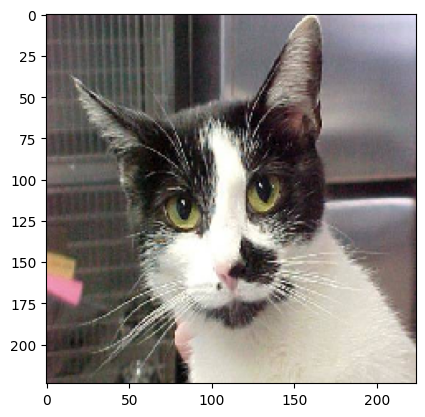

In [ ]:
plt.imshow(train_generator[0][0][4])

In [ ]:
print(f'{len(train_generator[0][0])} on batch 0')

32 on batch 0


In [ ]:
print(f'Classes from batch 0 images: {train_generator[0][1]}')

Classes from batch 0 images: [1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 1. 1. 0. 1. 0. 1. 1.]


# Obtain RNN model (Xception)

In [ ]:
model = Xception(
    input_shape=(224, 224, 3),
    include_top=False
)

In [ ]:
average_pooling = GlobalAveragePooling2D()(model.output)

In [ ]:
hidden = Dense(2048, activation='relu')(average_pooling)

In [ ]:
pred = Dense(1, activation='sigmoid')(hidden)

In [ ]:
final_model = Model(inputs=model.input, outputs=pred)

# Model Summary

In [ ]:
final_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 111, 111, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_bn           │ (None, 111, 111, 32)   │            128 │ block1_conv1[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1_act          │ (None, 111, 111, 32)   │              0 │ block1_conv1_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 109, 109, 64)   │         18,432 │ block1_conv1_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_bn           │ (None, 109, 109, 64)   │            256 │ block1_conv2[0][0]     │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2_act          │ (None, 109, 109, 64)   │              0 │ block1_conv2_bn[0][0]  │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1           │ (None, 109, 109, 128)  │          8,768 │ block1_conv2_act[0][0] │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv1_bn        │ (None, 109, 109, 128)  │            512 │ block2_sepconv1[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_act       │ (None, 109, 109, 128)  │              0 │ block2_sepconv1_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2           │ (None, 109, 109, 128)  │         17,536 │ block2_sepconv2_act[0… │
│ (SeparableConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_sepconv2_bn        │ (None, 109, 109, 128)  │            512 │ block2_sepconv2[0][0]  │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 55, 55, 128)    │          8,192 │ block1_conv2_act[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 55, 55, 128)    │              0 │ block2_sepconv2_bn[0]… │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 25,059,881 (95.60 MB)

 Trainable params: 25,005,353 (95.39 MB)

 Non-trainable params: 54,528 (213.00 KB)

# Compile model

In [ ]:
final_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Training model

In [ ]:
final_model.fit(
    train_generator,
    epochs=10,
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 179s 468ms/step - accuracy: 0.9158 - loss: 0.2055
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 118s 468ms/step - accuracy: 0.9651 - loss: 0.0876
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 143s 471ms/step - accuracy: 0.9782 - loss: 0.0593
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 142s 471ms/step - accuracy: 0.9826 - loss: 0.0527
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 118s 469ms/step - accuracy: 0.9894 - loss: 0.0273
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 118s 469ms/step - accuracy: 0.9831 - loss: 0.0505
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 143s 472ms/step - accuracy: 0.9905 - loss: 0.0267
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 118s 469ms/step - accuracy: 0.9894 - loss: 0.0302
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 143s 472ms/step - accuracy: 0.9953 - loss: 0.0168
Epoch 10/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 118s 469ms/step - accuracy: 0.9934 - loss: 0.0201


# Evaluate model

In [ ]:
final_model.evaluate(test_generator)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 235ms/step - accuracy: 0.9065 - loss: 0.7469


[0.7891790270805359, 0.9104999899864197]

In [ ]:
img_test  = test_generator[0][0][15]

final_model.predict(np.expand_dims(img_test, axis=0))
class_names = ['Cat', 'Dog']
predicted_class = (final_model.predict(np.expand_dims(img_test, axis=0)))

if(predicted_class[0][0] <= 0.5):
  print(class_names[0])
else:
  print(class_names[1])

print(f'{predicted_class[0][0] = }')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Dog
predicted_class[0][0] = 1.0


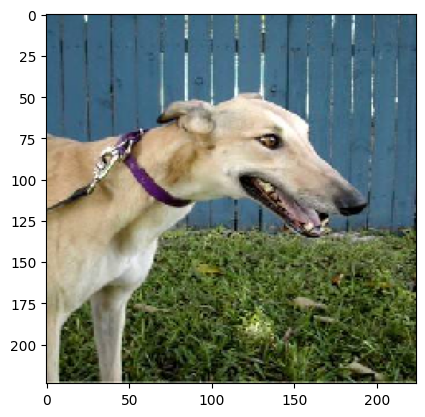

In [ ]:
plt.imshow(img_test)